# Car Price Prediction

In [1]:
#Importing libaries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.25.2', '1.5.3', '0.12.2', '3.7.2')

# Load data

In [3]:
#Load data
#Read the csv file

df = pd.read_csv(r'C:\Users\Panithi\Desktop\AIT\DSAI\ML\Assignment 1\Cars.csv')

In [4]:
#view the first 5 rows using df.head()

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
#Checking the shape of data using df.shape
#8,128 samples, 13 features before skimmimg

df.shape

(8128, 13)

In [6]:
#Checking Statistical Information using df.describe

df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
#Checking data types of the input data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


### Counting Null Values

In [8]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

### Check the columns names

In [9]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

# Exploratory Data Analysis (EDA)

## Univariate

### Countplot

<Axes: xlabel='seller_type', ylabel='count'>

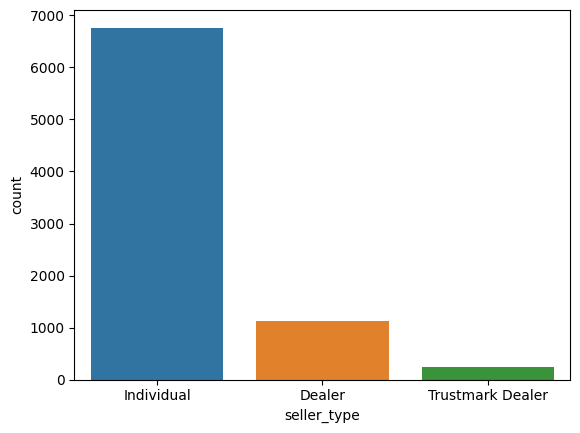

In [10]:
sns.countplot(data = df, x = 'seller_type')

<Axes: xlabel='owner', ylabel='count'>

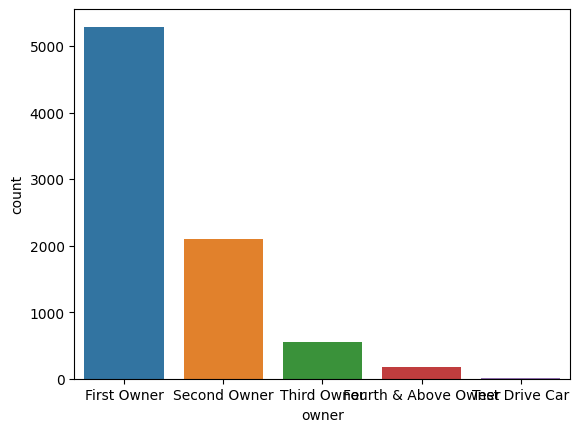

In [11]:
sns.countplot(data = df, x = 'owner')

<Axes: xlabel='fuel', ylabel='count'>

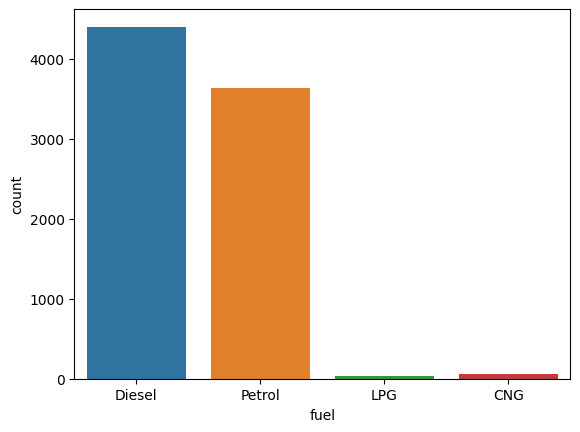

In [12]:
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='transmission', ylabel='count'>

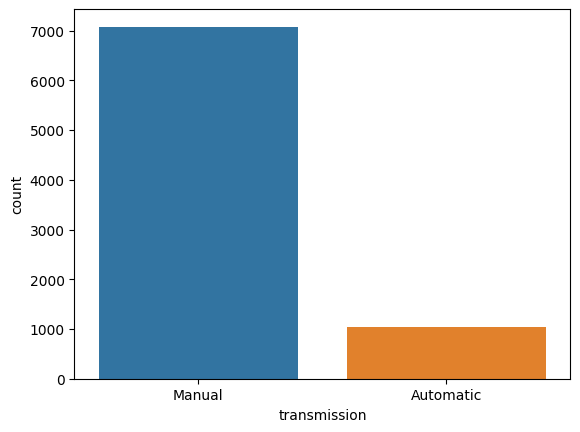

In [13]:
sns.countplot(data = df, x = 'transmission')

<Axes: xlabel='seats', ylabel='count'>

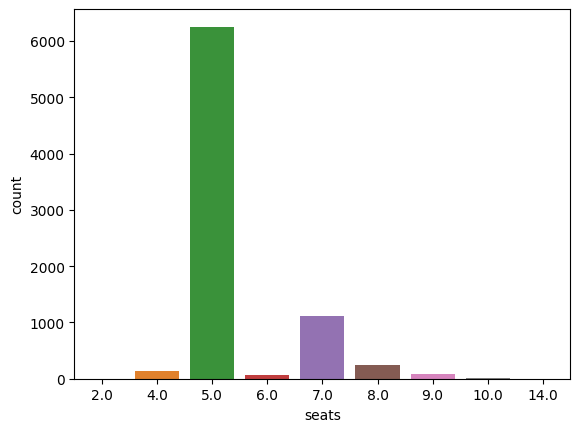

In [14]:
sns.countplot(data = df, x = 'seats')

### Distribution plot

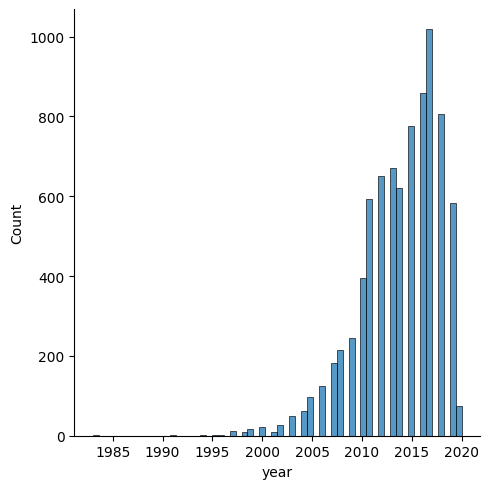

In [15]:
sns.displot(data = df, x = 'year')

## Preparing

In [16]:
unique_values = df['owner'].unique()
print(unique_values)

['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [17]:
mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

# Apply the mapping only to the 'owner' column
df['owner'] = df['owner'].map(mapping)

In [18]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [19]:
unique_values = df['owner'].unique()
print(unique_values)

[1 2 3 4 5]


#### Drop Torque Column

In [20]:
df = df.drop(columns = "torque")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,5.0


#### Remove CNG and LPG Rows 

In [21]:
for x in df.index:
    if df.loc[x, "fuel"] == 'CNG':
        df.drop(x, inplace=True)
        
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,5.0


In [22]:
for x in df.index:
    if df.loc[x, "fuel"] == 'LPG':
        df.drop(x, inplace=True)
        
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,5.0


#### Reset the index order

In [23]:
df.reset_index(drop=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8028,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,5.0
8029,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,5.0
8030,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,5.0
8031,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,5.0


#### Remove the Test Drive Car

In [24]:
unique_values = df['owner'].unique()
print(unique_values)

[1 2 3 4 5]


In [25]:
for x in df.index:
    if df.loc[x, "owner"] == 5:
        df.drop(x, inplace=True)
        
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,5.0


In [26]:
df.reset_index(drop=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8023,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,5.0
8024,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,5.0
8025,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,5.0
8026,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,5.0


#### Split The Value

##### name

In [27]:
df['name'] = df['name'].str.split().str[0]

df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,5.0


In [28]:
df.reset_index(drop=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8023,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,5.0
8024,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,5.0
8025,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,5.0
8026,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,5.0


##### mileage, engine, maxpower

In [29]:
df['mileage'] = df['mileage'].str.split().str[0]
df['engine'] = df['engine'].str.split().str[0]
df['max_power'] = df['max_power'].str.split().str[0]

df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.4,1248,74,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.7,1497,78,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.0,1396,90,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.1,1298,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.5,1197,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.8,1493,110,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.3,1248,73.9,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396,70,5.0


In [30]:
df = df.reset_index(drop=True)

df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.4,1248,74,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.7,1497,78,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.0,1396,90,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.1,1298,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8023,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.5,1197,82.85,5.0
8024,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.8,1493,110,5.0
8025,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.3,1248,73.9,5.0
8026,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396,70,5.0


#### Changing the data type

In [31]:
df['mileage'] = df['mileage'].astype(float)
df['engine'] = df['engine'].astype(float)
df['max_power'] = df['max_power'].astype(float)

df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8023,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8024,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8025,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8026,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8028 entries, 0 to 8027
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 752.8+ KB


#### Converting selling_price to log scale 

In [33]:
y = np.log(df['selling_price'])

#### Scatter Plot

<Axes: xlabel='mileage', ylabel='selling_price'>

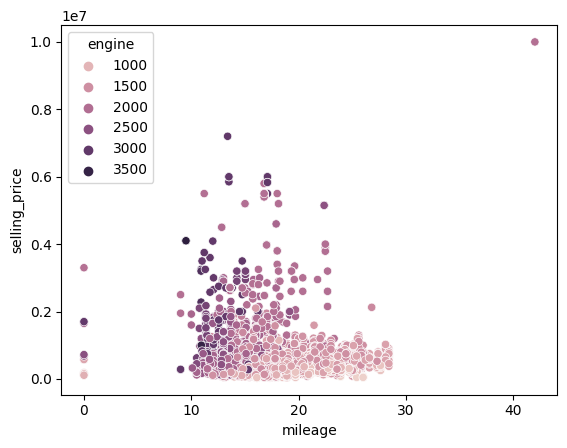

In [34]:
sns.scatterplot(x = df['mileage'], y = df['selling_price'], hue=df['engine'])

<Axes: xlabel='mileage', ylabel='selling_price'>

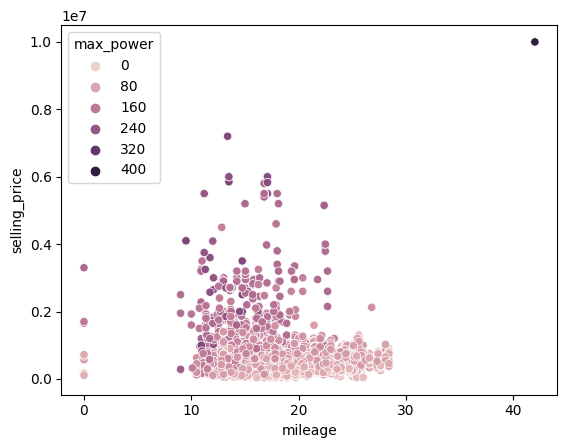

In [35]:
sns.scatterplot(x = df['mileage'], y = df['selling_price'], hue=df['max_power'])

<Axes: xlabel='mileage', ylabel='selling_price'>

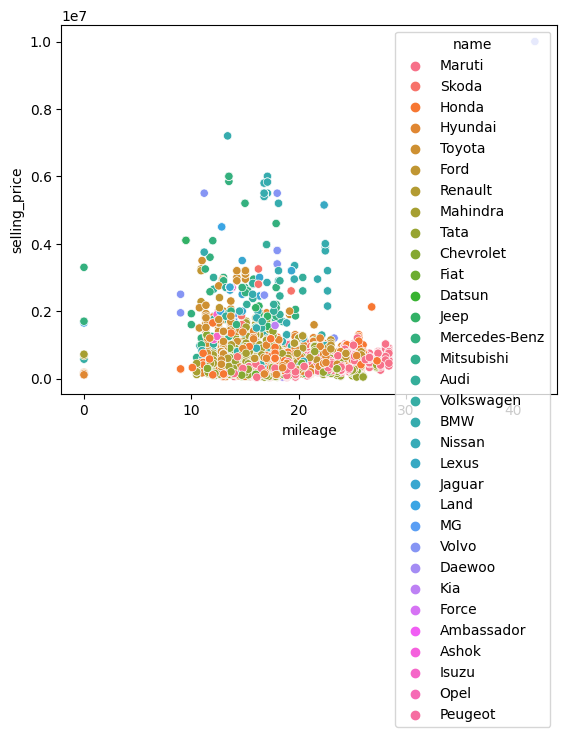

In [36]:
sns.scatterplot(x = df['mileage'], y = df['selling_price'], hue=df['name'])

<Axes: xlabel='mileage', ylabel='selling_price'>

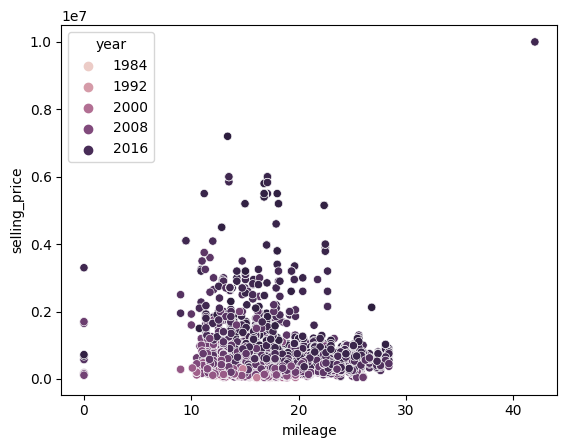

In [37]:
sns.scatterplot(x = df['mileage'], y = df['selling_price'], hue=df['year'])

<Axes: xlabel='max_power', ylabel='selling_price'>

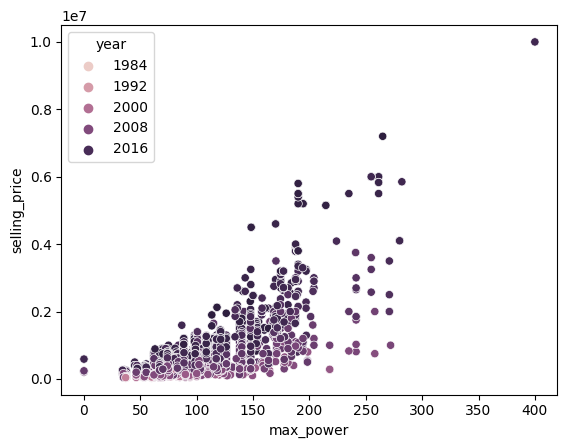

In [38]:
sns.scatterplot(x = df['max_power'], y = df['selling_price'], hue=df['year'])

<Axes: xlabel='owner', ylabel='selling_price'>

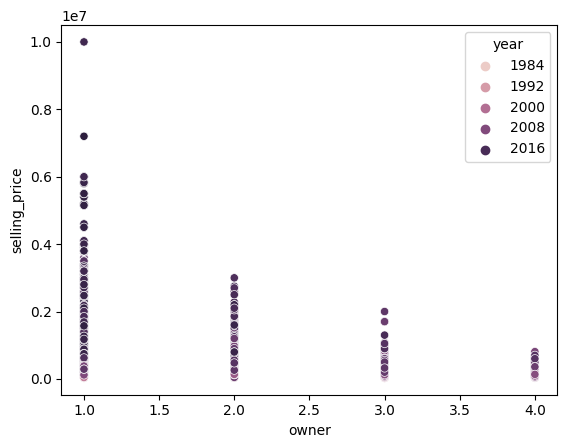

In [39]:
sns.scatterplot(x = df['owner'], y = df['selling_price'], hue=df['year'])

<Figure size 1500x800 with 0 Axes>

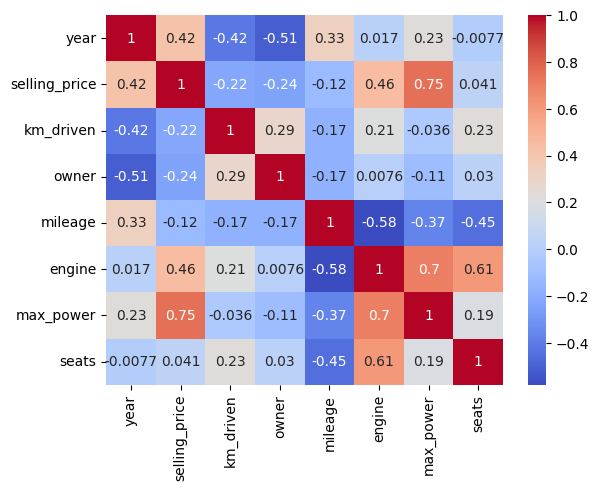

<Figure size 1500x800 with 0 Axes>

In [40]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.figure(figsize = (15,8))

#### PPS

In [41]:
pip install ppscore

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import ppscore as pps

<Axes: xlabel='x', ylabel='y'>

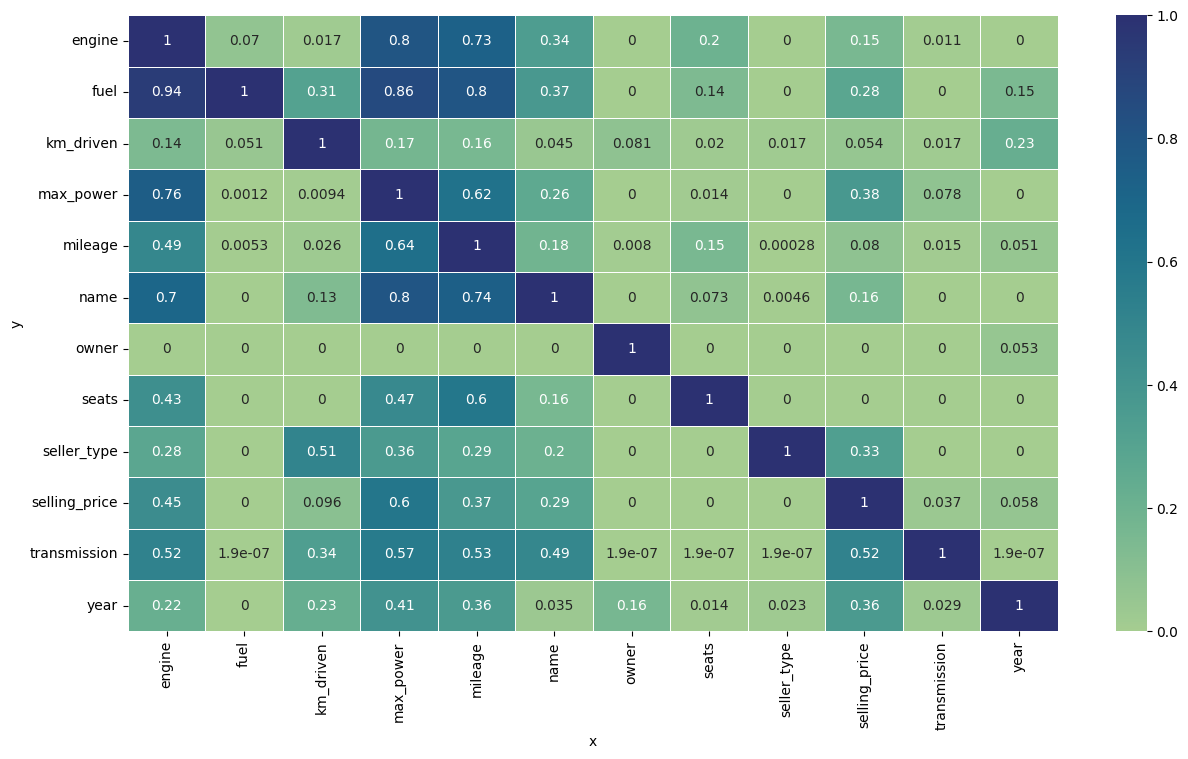

In [43]:
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')


plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="crest", linewidths=0.5, annot=True)

#### Converting The Label

In [44]:
min_value = 29999
max_value = 10000000

bins = [min_value, 100000, 200000, 400000, max_value]  # Define the price bins
labels = [0, 1, 2, 3]  # Assign labels to bins
df['selling_price'] = pd.cut(df['selling_price'], bins=bins, labels=labels, include_lowest=True)

In [45]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,3,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,2,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,1,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,2,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,1,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8023,Hyundai,2013,2,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8024,Hyundai,2007,1,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8025,Maruti,2009,2,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8026,Tata,2013,2,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


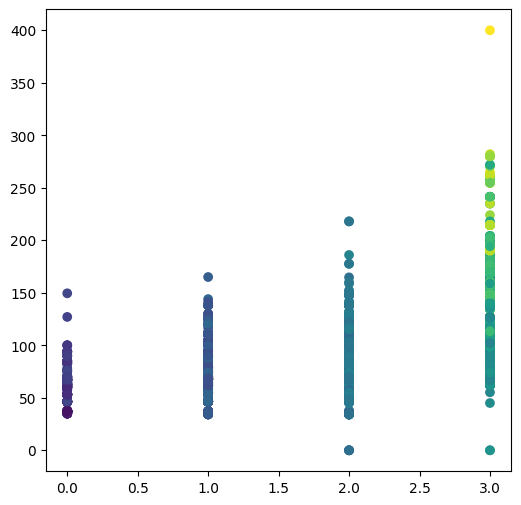

In [46]:
plt.figure(figsize=(6,6))
plt.scatter(y = df['max_power'], x = df['selling_price'], label='class 0', c=y)
plt.show()

In [47]:
#x is the strong features considered to be use
X = df[        ['max_power', 'engine', 'mileage']        ]

#y is the lebel that we want to predict (selling_price)
y = df["selling_price"]

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [49]:
assert X_train.ndim == 2
assert X_test.ndim  == 2
assert y_train.ndim == 1

print("(samples, features): ", X_train.shape)
print("(samples,         ): ", y_train.shape)
print("(samples, features): ", X_test.shape)

(samples, features):  (5619, 3)
(samples,         ):  (5619,)
(samples, features):  (2409, 3)


#### Filling the missing field

In [50]:
max_power_default = X_train['max_power'].median()
engine_default = X_train['engine'].median()
mileage_default = X_train['mileage'].mean()

### Preprocessing

#### null values

In [51]:
X_train[['max_power', 'engine', 'mileage']].isna().sum()

max_power    149
engine       154
mileage      154
dtype: int64

In [52]:
X_test[['max_power', 'engine', 'mileage']].isna().sum()

max_power    59
engine       60
mileage      60
dtype: int64

In [53]:
y_train.isna().sum()

0

In [54]:
y_test.isna().sum()

0

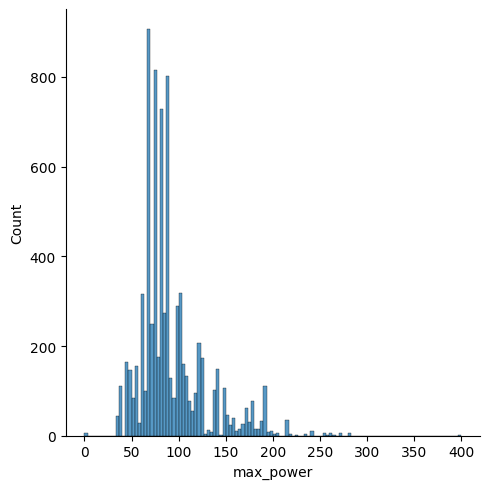

In [55]:
sns.displot(data=df, x='max_power')

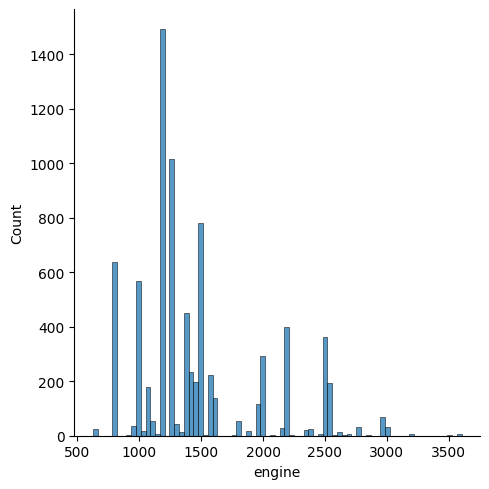

In [56]:
sns.displot(data=df, x='engine')

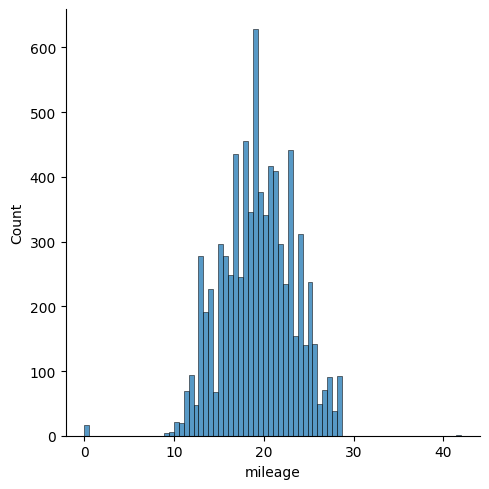

In [57]:
sns.displot(data=df, x='mileage')

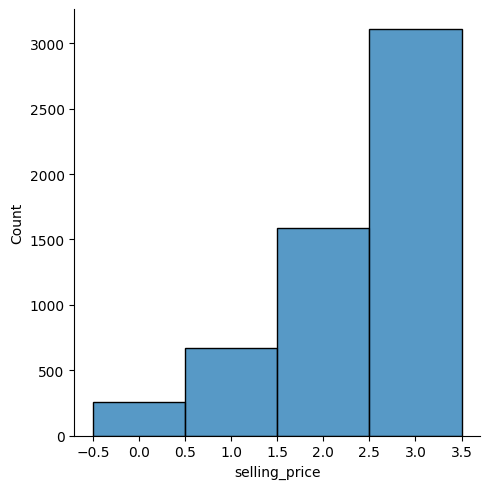

In [58]:
sns.displot(y_train)

#### Filling Missing Values

In [59]:
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [60]:
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

#### Checking Again

In [61]:
X_train[['max_power', 'engine', 'mileage']].isna().sum()

max_power    0
engine       0
mileage      0
dtype: int64

In [62]:
X_test[['max_power', 'engine', 'mileage']].isna().sum()

max_power    0
engine       0
mileage      0
dtype: int64

### Checking Outliers

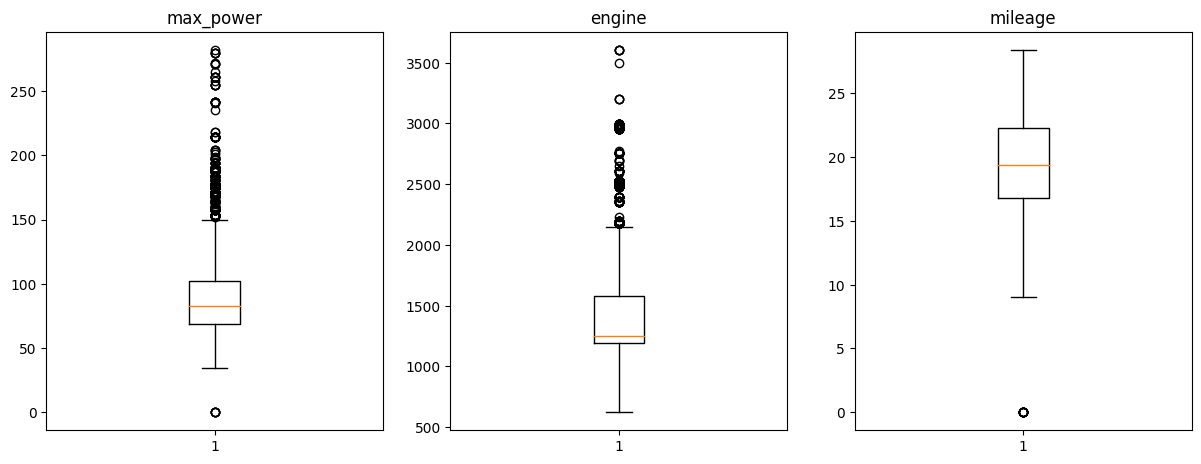

In [63]:
# Create a dictionary of feature's columns.
feat_dict = {'max_power':1,'engine':2,'mileage':3}


plt.figure(figsize=(20,30))

for variable,i in feat_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [64]:
def outlier_count(col, data = X_train):
    
    
    q75, q25 = np.percentile(data[col], [75, 25])
    
    
    iqr = q75 - q25
    
    
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [65]:
for col in X_train.columns:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%

---------------engine---------------

Number of outliers: 836
Percent of data that is outlier: 14.88%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%


### Scaling

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [67]:
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [68]:
# Checking shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 4)
Shape of X_test:  (2409, 4)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


### Modeling

In [69]:
import mlflow 
import os
import mlflow.sklearn
import math 
#mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")
#os.environ["LOGNAME"] = "ML_A3_212"
#mlflow.set_experiment(experiment_name="st123212-a3")

In [70]:
#min_value = 29999
#max_value = 1000000

#bins = [min_value, 100000, 200000, 400000, max_value]  # Define the price bins
#labels = [0, 1, 2, 3]  # Assign labels to bins
#df['selling_price'] = pd.cut(df['selling_price'], bins=bins, labels=labels, include_lowest=True)

In [71]:
#df

In [72]:
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features

y_train = np.array(y_train)
Y_train_encoded = np.zeros((m, k))

for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

In [73]:
#plt.figure(figsize=(6,6))
#plt.scatter(y = df['max_power'], x = df['selling_price'], label='class 0', c=y)
#plt.show()

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time

class LogisticRegression:
    
    def __init__(self, k, n, method, alpha=0.001, max_iter=5000, use_ridge=False, ridge_lambda=0.1):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.use_ridge = use_ridge
        self.ridge_lambda = ridge_lambda  # Ridge penalty parameter
        self.W = None
        self.losses = []

    def fit(self, X_train, y_train):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
                    
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad = self.gradient(X_train, y_train)
                self.losses.append(loss)
                if self.use_ridge:
                    grad_penalty = self.ridge_lambda * self.W
                    grad += grad_penalty
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}: {loss}")
            print(f"Time taken: {time.time() - start_time} seconds")

        elif self.method == "minibatch":  # Add minibatch code here
            batch_size = 50  # Define batch size
            num_batches = len(X_train) // batch_size
            start_time = time.time()

            for i in range(self.max_iter):
                for batch_num in range(num_batches):
                    start = batch_num * batch_size
                    end = (batch_num + 1) * batch_size
                    batch_X = X_train[start:end]
                    batch_Y = y_train[start:end]

                    loss, grad = self.gradient(batch_X, batch_Y)
                    self.losses.append(loss)
                    if self.use_ridge:
                        grad_penalty = self.ridge_lambda * self.W
                        grad += grad_penalty
                    self.W = self.W - self.alpha * grad

                if i % 500 == 0:
                    print(f"Loss at iteration {i}: {loss}")

            print(f"Time taken: {time.time() - start_time} seconds")

        elif self.method == "sto":  # Add stochastic gradient descent (sto) code here
            start_time = time.time()
            list_of_used_ix = []

            for i in range(self.max_iter):
                idx = np.random.randint(X_train.shape[0])

                while idx in list_of_used_ix:
                    idx = np.random.randint(X_train.shape[0])

                X_train_sto = X_train[idx, :].reshape(1, -1)
                Y_train_sto = y_train[idx]

                loss, grad = self.gradient(X_train_sto, Y_train_sto)
                self.losses.append(loss)
                if self.use_ridge:
                    grad_penalty = self.ridge_lambda * self.W
                    grad += grad_penalty
                self.W = self.W - self.alpha * grad

                list_of_used_ix.append(idx)

                if len(list_of_used_ix) == X_train.shape[0]:
                    list_of_used_ix = []

                if i % 500 == 0:
                    print(f"Loss at iteration {i}: {loss}")

            print(f"Time taken: {time.time() - start_time} seconds")

        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')

                    

    def accuracy(self, y_true, y_pred):
        correct_predictions = np.sum(y_true == y_pred)
        total_predictions = len(y_true)
        return correct_predictions / total_predictions

    def precision(self, y_true, y_pred, class_label):
        true_positive = np.sum((y_true == class_label) & (y_pred == class_label))
        false_positive = np.sum((y_true != class_label) & (y_pred == class_label))

        if true_positive + false_positive == 0:
            return 0  # To avoid division by zero

        return true_positive / (true_positive + false_positive)

    def recall(self, y_true, y_pred, class_label):
        true_positive = np.sum((y_true == class_label) & (y_pred == class_label))
        false_negative = np.sum((y_true == class_label) & (y_pred != class_label))

        if true_positive + false_negative == 0:
            return 0  # To avoid division by zero

        return true_positive / (true_positive + false_negative)

    def f1_score(self, y_true, y_pred, class_label):
        prec = self.precision(y_true, y_pred, class_label)
        rec = self.recall(y_true, y_pred, class_label)

        if prec + rec == 0:
            return 0  # To avoid division by zero

        return 2 * (prec * rec) / (prec + rec)

    def macro_precision(self, y_true, y_pred):
        unique_labels = np.unique(y_true)
        precision_sum = 0

        for class_label in unique_labels:
            precision_sum += self.precision(y_true, y_pred, class_label)

        return precision_sum / len(unique_labels)

    def macro_recall(self, y_true, y_pred):
        unique_labels = np.unique(y_true)
        recall_sum = 0

        for class_label in unique_labels:
            recall_sum += self.recall(y_true, y_pred, class_label)

        return recall_sum / len(unique_labels)

    def macro_f1_score(self, y_true, y_pred):
        unique_labels = np.unique(y_true)
        f1_score_sum = 0

        for class_label in unique_labels:
            f1_score_sum += self.f1_score(y_true, y_pred, class_label)

        return f1_score_sum / len(unique_labels)

    def weighted_precision(self, y_true, y_pred):
        unique_labels = np.unique(y_true)
        class_counts = [np.sum(y_true == label) for label in unique_labels]

        weighted_prec_sum = 0

        for label, class_count in zip(unique_labels, class_counts):
            weight = class_count / len(y_true)
            weighted_prec_sum += self.precision(y_true, y_pred, label) * weight

        return weighted_prec_sum

    def weighted_recall(self, y_true, y_pred):
        unique_labels = np.unique(y_true)
        class_counts = [np.sum(y_true == label) for label in unique_labels]

        weighted_rec_sum = 0

        for label, class_count in zip(unique_labels, class_counts):
            weight = class_count / len(y_true)
            weighted_rec_sum += self.recall(y_true, y_pred, label) * weight

        return weighted_rec_sum

    def weighted_f1_score(self, y_true, y_pred):
        unique_labels = np.unique(y_true)
        class_counts = [np.sum(y_true == label) for label in unique_labels]

        weighted_f1_sum = 0

        for label, class_count in zip(unique_labels, class_counts):
            weight = class_count / len(y_true)
            weighted_f1_sum += self.f1_score(y_true, y_pred, label) * weight

        return weighted_f1_sum

    def gradient(self, X, y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = -np.sum(y * np.log(h)) / m

        error = h - y
        grad_loss = X.T @ error

        if self.use_ridge:
            # Include Ridge penalty in the gradient
            grad_penalty = 2 * self.ridge_lambda * self.W
        else:
            grad_penalty = 0.0

        grad = grad_loss + grad_penalty
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return X.T @ error

    def h_theta(self, X, W):
        return self.softmax(X @ W)

    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def _coef(self):
        return self.W[1:]

    def plot(self):
        plt.plot(np.arange(len(self.losses)), self.losses, label="Train Losses")
        plt.title("Losses")
        plt.xlabel("Epoch")
        plt.ylabel("Losses")
        plt.legend()
        
    def plot_feature_importance(self, feature_names):
        feature_importance = np.abs(self._coef())
        sorted_indices = np.argsort(feature_importance)
        sorted_features = [feature_names[i] for i in sorted_indices]

        plt.figure(figsize=(10, 6))
        plt.barh(sorted_features, feature_importance[sorted_indices])
        plt.xlabel('Feature Importance')
        plt.title('Feature Importance')
        plt.show()


In [75]:
class RidgePenalty:
    def __init__(self, lambda_ridge):
        self.lambda_ridge = lambda_ridge

    def __call__(self, W):
        return self.lambda_ridge * np.sum(W**2)

    def derivative(self, W):
        return 2 * self.lambda_ridge * W

class RidgeLogisticRegression(LogisticRegression):
    def __init__(self, k, n, method, alpha=0.001, max_iter=5000, ridge_lambda=1.0):
        super().__init__(k, n, method, alpha, max_iter, use_ridge=True, ridge_lambda=ridge_lambda)
        self.penalty = RidgePenalty(ridge_lambda)

k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features

methods = ["batch","minibatch","sto"]
alphas = [0.01, 0.001, 0.0001]

use_ridge_values = [True, False]
ridge_lambda_values = [0.1]


for method in methods:
    for alpha in alphas:
        for use_ridge in use_ridge_values:
            for ridge_lambda in ridge_lambda_values:
                params = {"method": method, "alpha": alpha, "use_ridge": use_ridge, "ridge_lambda": ridge_lambda}
                mlflow.start_run(run_name=f"method-{params['method']}-alpha-{params['alpha']}-use_ridge-{params['use_ridge']}", nested=True)
                mlflow.log_params(params=params)
                
                model = LogisticRegression(k, n, method, alpha, use_ridge, ridge_lambda)
                model.fit(X_train, Y_train_encoded)
                y_hat = model.predict(X_train)
                accuracy = model.accuracy(y_train, y_hat)
                precision = model.precision(y_train, y_hat)
                recall = model.recall(y_train, y_hat)
                f1_score = model.f1_score(y_train, y_hat)
                macro_avg_precision = model.macro_precision(y_train, y_hat)
                macro_avg_recall = model.macro_recall(y_train, y_hat)
                macro_avg_f1 = model.macro_f1_score(y_train, y_hat)
                weighted_avg_precision = model.weighted_precision(y_train, y_hat)
                weighted_avg_recall = model.weighted_recall(y_train, y_hat)
                weighted_avg_f1 = model.weighted_f1_score(y_train, y_hat)
                

                print("=========Classification report=======")

                print("Accuracy: ", accuracy)
                mlflow.log_metric(key="accuracy", value=accuracy)

                print("Macro Avg Precision: ", macro_avg_precision)
                mlflow.log_metric(key="macro_avg_precision", value=macro_avg_precision)

                print("Macro Avg Recall: ", macro_avg_recall)
                mlflow.log_metric(key="macro_avg_recall", value=macro_avg_recall)

                print("Macro Avg F1: ", macro_avg_f1)
                mlflow.log_metric(key="macro_avg_f1", value=macro_avg_f1)

                print("Weighted Avg Precision: ", weighted_avg_precision)
                mlflow.log_metric(key="weighted_avg_precision", value=weighted_avg_precision)

                print("Weighted Avg Recall: ", weighted_avg_recall)
                mlflow.log_metric(key="weighted_avg_recall", value=weighted_avg_recall)

                print("Weighted Avg F1: ", weighted_avg_f1)
                mlflow.log_metric(key="weighted_avg_f1", value=weighted_avg_f1)



                    # Log the model if needed
                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)
                
                mlflow.end_run() # End the current run
                            

In [76]:
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features

print (n)
print (m)
print (k)

4
5619
4


Loss at iteration 0: 0.7934088963028715
Time taken: 0.007971048355102539 seconds
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00       258
           1       0.29      0.04      0.08       667
           2       0.46      0.63      0.53      1587
           3       0.80      0.86      0.83      3107

    accuracy                           0.66      5619
   macro avg       0.39      0.38      0.36      5619
weighted avg       0.61      0.66      0.62      5619

=========Classification report from scratch=======
Accuracy:  0.6599038974906567
Precision:  0.7976827094474154
Recall:  0.8641776633408432
F1 Score:  0.8295998764097018
Macro Avg Precision:  0.3870549079521105
Macro Avg Recall:  0.38371601481832796
Macro Avg F1:  0.3597513676309918
Weighted Avg Precision:  0.6058226835122715
Weighted Avg Recall:  0.6599038974906567
Weighted Avg F1:  0.6180989790220649


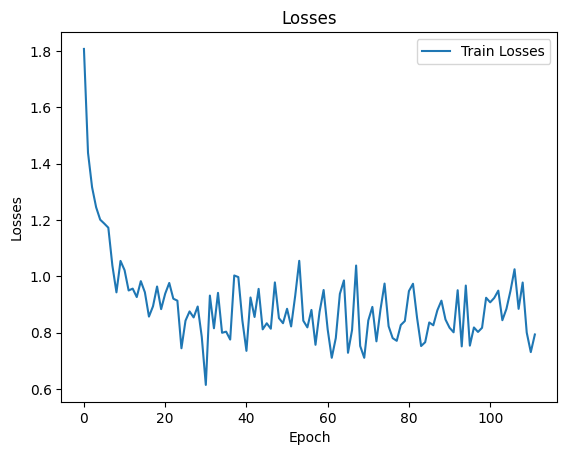

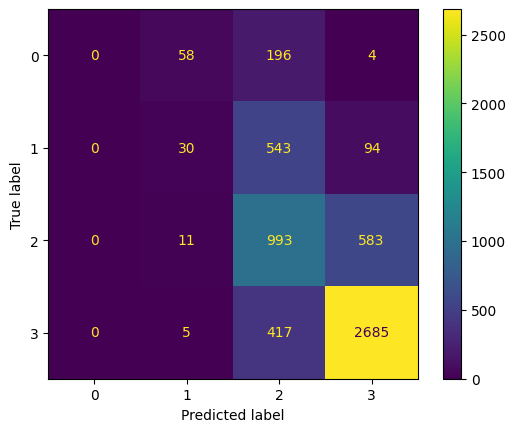

In [77]:
from sklearn.metrics import classification_report

k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features

#model = LogisticRegression(k, n, method, alpha, use_ridge, ridge_lambda)
model = LogisticRegression(k, n, "minibatch", 0.01, True, 0.1)
model.fit(X_train, Y_train_encoded)
y_hat = model.predict(X_train)

accuracy = model.accuracy(y_train, y_hat)
precision = model.precision(y_train, y_hat, class_label = 3)
recall = model.recall(y_train, y_hat, class_label = 3)
f1_score = model.f1_score(y_train, y_hat, class_label = 3)
macro_avg_precision = model.macro_precision(y_train, y_hat)
macro_avg_recall = model.macro_recall(y_train, y_hat)
macro_avg_f1 = model.macro_f1_score(y_train, y_hat)
weighted_avg_precision = model.weighted_precision(y_train, y_hat)
weighted_avg_recall = model.weighted_recall(y_train, y_hat)
weighted_avg_f1 = model.weighted_f1_score(y_train, y_hat)
                
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_train, y_hat))

print("=========Classification report from scratch=======")

print("Accuracy: ", accuracy)

print("Precision: ", precision)

print("Recall: ", recall)

print("F1 Score: ", f1_score)

print("Macro Avg Precision: ", macro_avg_precision)

print("Macro Avg Recall: ", macro_avg_recall)

print("Macro Avg F1: ", macro_avg_f1)

print("Weighted Avg Precision: ", weighted_avg_precision)

print("Weighted Avg Recall: ", weighted_avg_recall)

print("Weighted Avg F1: ", weighted_avg_f1)

cm = confusion_matrix(y_train, y_hat)
cmp = ConfusionMatrixDisplay(cm, display_labels=[0, 1, 2, 3])

cmp.plot()


### Testing

=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.33      0.06      0.10       316
           2       0.43      0.60      0.50       667
           3       0.79      0.86      0.82      1314

    accuracy                           0.64      2409
   macro avg       0.39      0.38      0.36      2409
weighted avg       0.59      0.64      0.60      2409

=========Classification report from scratch=======
Accuracy:  0.6409298464092985
Precision:  0.7881118881118881
Recall:  0.8576864535768646
F1 Score:  0.8214285714285714
Macro Avg Precision:  0.38680069930069927
Macro Avg Recall:  0.37821234461088626
Macro Avg F1:  0.35500873766011987
Weighted Avg Precision:  0.5923702490950311
Weighted Avg Recall:  0.6409298464092985
Weighted Avg F1:  0.5996547524284395


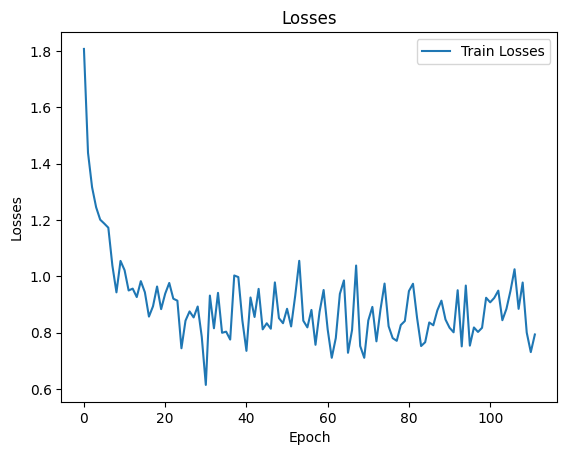

In [78]:
y_hat = model.predict(X_test)
accuracy = model.accuracy(y_test, y_hat)
precision = model.precision(y_test, y_hat, class_label = 3)
recall = model.recall(y_test, y_hat, class_label = 3)
f1_score = model.f1_score(y_test, y_hat, class_label = 3)
macro_avg_precision = model.macro_precision(y_test, y_hat)
macro_avg_recall = model.macro_recall(y_test, y_hat)
macro_avg_f1 = model.macro_f1_score(y_test, y_hat)
weighted_avg_precision = model.weighted_precision(y_test, y_hat)
weighted_avg_recall = model.weighted_recall(y_test, y_hat)
weighted_avg_f1 = model.weighted_f1_score(y_test, y_hat)
                
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, y_hat))

print("=========Classification report from scratch=======")

print("Accuracy: ", accuracy)

print("Precision: ", precision)

print("Recall: ", recall)

print("F1 Score: ", f1_score)

print("Macro Avg Precision: ", macro_avg_precision)

print("Macro Avg Recall: ", macro_avg_recall)

print("Macro Avg F1: ", macro_avg_f1)

print("Weighted Avg Precision: ", weighted_avg_precision)

print("Weighted Avg Recall: ", weighted_avg_recall)

print("Weighted Avg F1: ", weighted_avg_f1)

### Analysis

#### Features Importance

In [79]:
# model.plot_feature_importance(['max_power', 'engine', 'mileage'])

### Inference

In [80]:
import pickle

model_and_scaler = {
    'model': model,
    'scaler': scaler,
    'engine_default' : engine_default,
    'mileage_default' : mileage_default,
    'max_power_default' : max_power_default,
}

filename = 'C:\\Users\\Panithi\\Desktop\\AIT\\DSAI\\ML\\Assignment 3\\Car-Price-3.model'
pickle.dump(model_and_scaler, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

df[['max_power', 'engine', 'mileage', 'selling_price']].loc[1]

max_power         103.52
engine           1498.00
mileage            21.14
selling_price       2.00
Name: 1, dtype: float64

In [87]:
sample = np.array([[103.52, 1498.00, 21.14]])
sample_s = scaler.transform(sample)

In [88]:
intercept = np.ones((sample_s.shape[0], 1))
sample_i = np.concatenate((intercept, sample_s), axis=1)

In [89]:
loaded_model = pickle.load(open(filename,'rb'))
model = loaded_model['model']
scaler = loaded_model['scaler']

predicted_car_price = model.predict(sample_i)
predicted_car_price

array([3], dtype=int64)

#### Report

#### Introduction:
This assignment presents a comprehensive analysis of a logistic regression model's performance varying on the hyperparameters on a dataset with four classes (0, 1, 2, and 3) of the selling price which is our label. The primary objective is to evaluate the model's classification accuracy and delve into various performance metrics for a deeper understanding.

#### Model Configuration:
The logistic regression model was configured with the following parameters:

Number of Classes (k): 4
Number of Features (n): [The number of features in your dataset]
Optimization Method: Mini-batch Gradient Descent
Learning Rate (alpha): 0.01
Regularization (L2 Ridge): Enabled with Lambda = 0.1
Performance Metrics:

##### Accuracy: 
The model achieves an overall accuracy of 65.99%, indicating its ability to correctly classify instances across all classes.

##### Precision: 
Precision measures the ratio of correctly predicted positive instances to all instances predicted as positive. Precision values vary by class (e.g., 0: 0.00%, 1: 29.00%, 2: 46.00%, 3: 80.00%). These values reveal that the model excels at precision for class 3, while class 0 has a precision of 0%, indicating room for improvement.

##### Recall: 
Recall measures the ratio of correctly predicted positive instances to all actual positive instances. Recall values also differ by class (e.g., 0: 0.00%, 1: 4.00%, 2: 63.00%, 3: 86.00%). Class 3 exhibits the highest recall, while class 0 has the lowest recall.

##### F1 Score: 
The F1 score is the harmonic mean of precision and recall. It varies by class (e.g., 0: 0.00%, 1: 8.00%, 2: 53.00%, 3: 83.00%). It highlights the trade-off between precision and recall for each class.

##### Macro-Averaged Metrics: 
Macro-averaged precision, recall, and F1-score are computed, resulting in metrics of 38.71%, 38.37%, and 35.98%, respectively. These values indicate an overall balanced performance across classes.

##### Weighted-Averaged Metrics: 
Weighted-averaged precision, recall, and F1-score consider class imbalance, yielding metrics of 60.58%, 65.99%, and 61.81%, respectively. These values provide a sense of the model's performance, accounting for class distribution.

#### Conclusion:
In summary, the logistic regression model demonstrates varying levels of precision and recall across different classes, reflecting its ability to classify instances accurately. While the model achieves a respectable overall accuracy of 65.99%, further analysis and potential model refinement may be necessary to address disparities in class-specific performance. Understanding these metrics is crucial for fine-tuning the model and improving its predictive capabilities.